<h1>Bitcoin Price Analysis:</h1> <br>
1) we import the basic packages required. <br>
2) we get the data Bitcoin.csv which was obtained from poloniex api using "bitcoin get data" notebook <br>
3) we use pandas.read_csv to get data into dataframe df <br>
4) we need to convert the date column into date format,we use pd.to_datetime for it <br>

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/harsh/Bitcoin/Bitcoin.csv', sep ='\t')

In [3]:
df.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,225.0,1424368800,225.0,225.0,225.0,0.004444,0.999999,225.000000
1,244.0,1424376000,244.0,225.0,225.0,0.188671,45.275877,239.972316
2,244.0,1424383200,244.0,244.0,244.0,0.000002,0.000437,244.000000
3,244.0,1424390400,244.0,244.0,244.0,0.000000,0.000000,244.000000
4,244.0,1424397600,244.0,244.0,244.0,0.000000,0.000000,244.000000


In [4]:
df.date = pd.to_datetime(df.date , unit ='s').dt.date


In [5]:
df.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,225.0,2015-02-19,225.0,225.0,225.0,0.004444,0.999999,225.000000
1,244.0,2015-02-19,244.0,225.0,225.0,0.188671,45.275877,239.972316
2,244.0,2015-02-19,244.0,244.0,244.0,0.000002,0.000437,244.000000
3,244.0,2015-02-20,244.0,244.0,244.0,0.000000,0.000000,244.000000
4,244.0,2015-02-20,244.0,244.0,244.0,0.000000,0.000000,244.000000


Lets get a correlation matrix map and see how our columns are correlated to each other <br>


([<matplotlib.axis.YTick at 0x1bfe4805a90>,
 <a list of 7 Text yticklabel objects>)

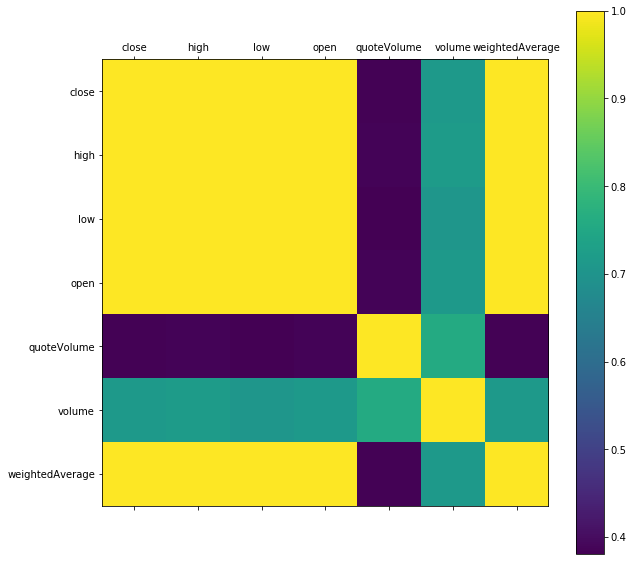

In [6]:

fig , ax = plt.subplots(figsize = (10,10))
ax.matshow(df.corr())
fig.colorbar(ax.matshow(df.corr()))
plt.xticks(range(len(df.corr().columns)) , df.corr().columns)
plt.yticks(range(len(df.corr().columns)) , df.corr().columns)

In [7]:
#set the weighteraverage as the mean of all the prices for that day first lets use only the weightaverage of previous day to predict for the next day
dateData = df.groupby('date')
bitcoinprice = dateData['weightedAverage'].mean()
bitcoinprice

date
2015-02-19      236.324105
2015-02-20      241.569796
2015-02-21      241.437500
2015-02-22      243.388902
2015-02-23      235.000028
2015-02-24      236.645849
2015-02-25      238.678477
2015-02-26      238.237145
2015-02-27      243.989568
2015-02-28      240.862461
2015-03-01      247.333363
2015-03-02      253.314502
2015-03-03      266.615478
2015-03-04      267.481888
2015-03-05      269.582689
2015-03-06      267.340422
2015-03-07      260.000005
2015-03-08      262.073816
2015-03-09      266.624219
2015-03-10      278.659841
2015-03-11      284.177607
2015-03-12      276.015527
2015-03-13      295.400651
2015-03-14      275.104856
2015-03-15      277.223667
2015-03-16      279.931787
2015-03-17      275.000000
2015-03-18      275.035339
2015-03-19      259.265596
2015-03-20      262.772903
                  ...     
2017-11-15     6997.991248
2017-11-16     7457.755716
2017-11-17     7815.083058
2017-11-18     7683.254751
2017-11-19     7842.023700
2017-11-20     8125.694

In [41]:
#get the values of bitcoinprice , reshape to avoid value error
#we need to scale the data before we feed it into our neural network

price = bitcoinprice.values.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
price_scales = sc.fit_transform(price)



#lets use LSTM to check our predict for a 2 weeks
prediction_week_days = 14
train = price_scales[:len(price_scales) - 14,:]
test = price_scales[len(bitcoinprice) - 14 :,:]

In [9]:
train

array([[ 0.00180778],
       [ 0.00213158],
       [ 0.00212341],
       ..., 
       [ 0.59377336],
       [ 0.62438279],
       [ 0.59102782]])

In [10]:
test

array([[ 0.61247939],
       [ 0.66132933],
       [ 0.68266717],
       [ 0.68586139],
       [ 0.70668546],
       [ 0.76068084],
       [ 0.89139668],
       [ 0.93475184],
       [ 0.89917274],
       [ 0.86357207],
       [ 0.99761017],
       [ 1.        ],
       [ 0.97733098],
       [ 0.97900209]])

In [11]:
price_scales

array([[ 0.00180778],
       [ 0.00213158],
       [ 0.00212341],
       ..., 
       [ 1.        ],
       [ 0.97733098],
       [ 0.97900209]])

Now lets create test and train dataset <br>
we are doing predicition based on the previous day.
So train X will all the data expect the last row
and train Y will start after leaving the first row<br>
we need to create to array for shape and other np functionalities<br>

In [12]:
trainX =[]
trainY =[]
testX=[]
testY=[]

for i in range(len(train) - 1):
    trainX.append(train[i:(i+1),0])
    trainY.append(train[i + 1 , 0])
trainX = np.array(trainX)
trainY = np.array(trainY)
trainX = np.reshape(trainX, (trainX.shape[0] , 1 , trainX.shape[1]))
for i in range(len(test) - 1):
    testX.append(test[i:(i+1),0])
    testY.append(test[i + 1 , 0])
    
    
testX = np.array(testX)
testY=np.array(testY)
testX = np.reshape(testX, (testX.shape[0] , 1 , testX.shape[1]))
print(len(trainX))
print(len(trainY))
print(len(testX))
print(len(testY))

1015
1015
13
13


Lets look at the data before we build our model

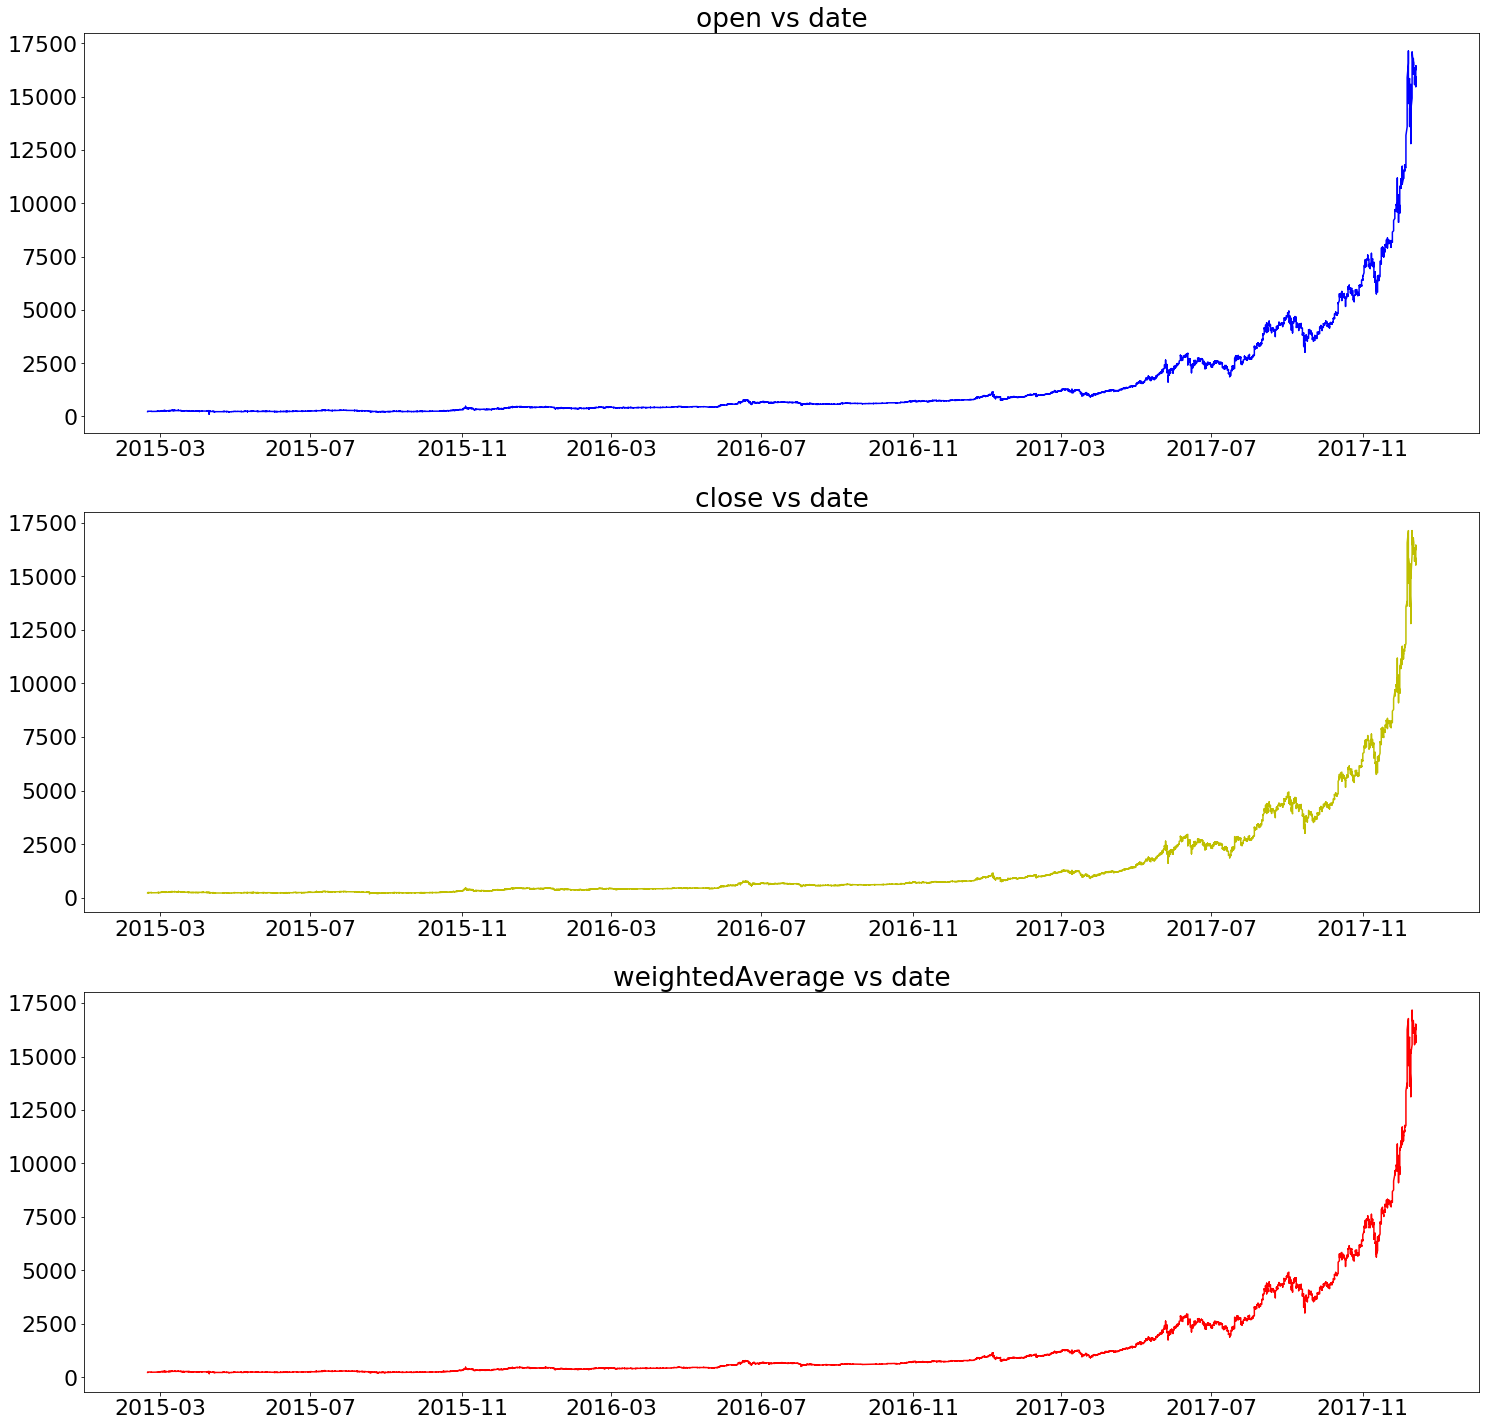

In [42]:
plt.rcParams.update({'font.size': 22})
df.index = df['date']
plt.figure(figsize=(25,25))
plt.subplot( 3 , 1 , 1)
plt.plot(df['open'] , 'b-')
plt.title("open vs date")
plt.subplot( 3 , 1 , 2)
plt.plot(df['close'] ,'y-')
plt.title("close vs date")
plt.subplot( 3 , 1 , 3)
plt.plot(df['weightedAverage'] ,'r-')


plt.title("weightedAverage vs date")

<h1> Build Neural Network </h1> <br>
1) import keras and other required libraries<br>
2) clear session <br>
3) build the model , with 20 neurons and input shape is set which is carried on for other layers<br>
4) droupout to avoid overfitting<br>
5) dense layer , as regression here we don't use an activation function<br>
6) for regression , loss is MSE/L2 loss and best optimizer is adam<br>



In [13]:
import keras

Using TensorFlow backend.


In [14]:
from keras import applications
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

In [43]:
import keras.backend as K
K.clear_session()

In [ ]:
test

In [44]:
from keras.optimizers import SGD
from keras.layers import LSTM

model = Sequential()


model.add(LSTM(20,input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(1e-7))
model.add(Dense(1))


#opt = SGD(lr=0.01)
#model.compile(loss = "categorical_crossentropy", optimizer = opt
model.compile(optimizer='adam',loss='mse')

Now that we have our model , lets train it and validate using test data <br>


In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(trainX, trainY, epochs=300, batch_size=50 , validation_data=(testX,testY))

Train on 1015 samples, validate on 13 samples
Epoch 1/300
1015/1015 [==============================] - 0s 74us/step - loss: 2.4990e-05 - val_loss: 0.0030
Epoch 2/300
1015/1015 [==============================] - 0s 127us/step - loss: 2.4556e-05 - val_loss: 0.0030
Epoch 3/300
1015/1015 [==============================] - 0s 136us/step - loss: 2.4857e-05 - val_loss: 0.0030
Epoch 4/300
1015/1015 [==============================] - 0s 121us/step - loss: 2.4715e-05 - val_loss: 0.0030

Lets predict on our test data <br>
after that perfrom inverse transform to get back actual price<br>
plot it

In [52]:
predictedvalues = model.predict(testX)
predictedvalues_actual = sc.inverse_transform(predictedvalues)
testY_actual = sc.inverse_transform(testY)
predictedvalues

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([[ 0.62001795],
       [ 0.66851532],
       [ 0.68958229],
       [ 0.69272959],
       [ 0.71320486],
       [ 0.76593655],
       [ 0.8912037 ],
       [ 0.93193084],
       [ 0.89854002],
       [ 0.86484224],
       [ 0.99019521],
       [ 0.99239153],
       [ 0.97150177]], dtype=float32)

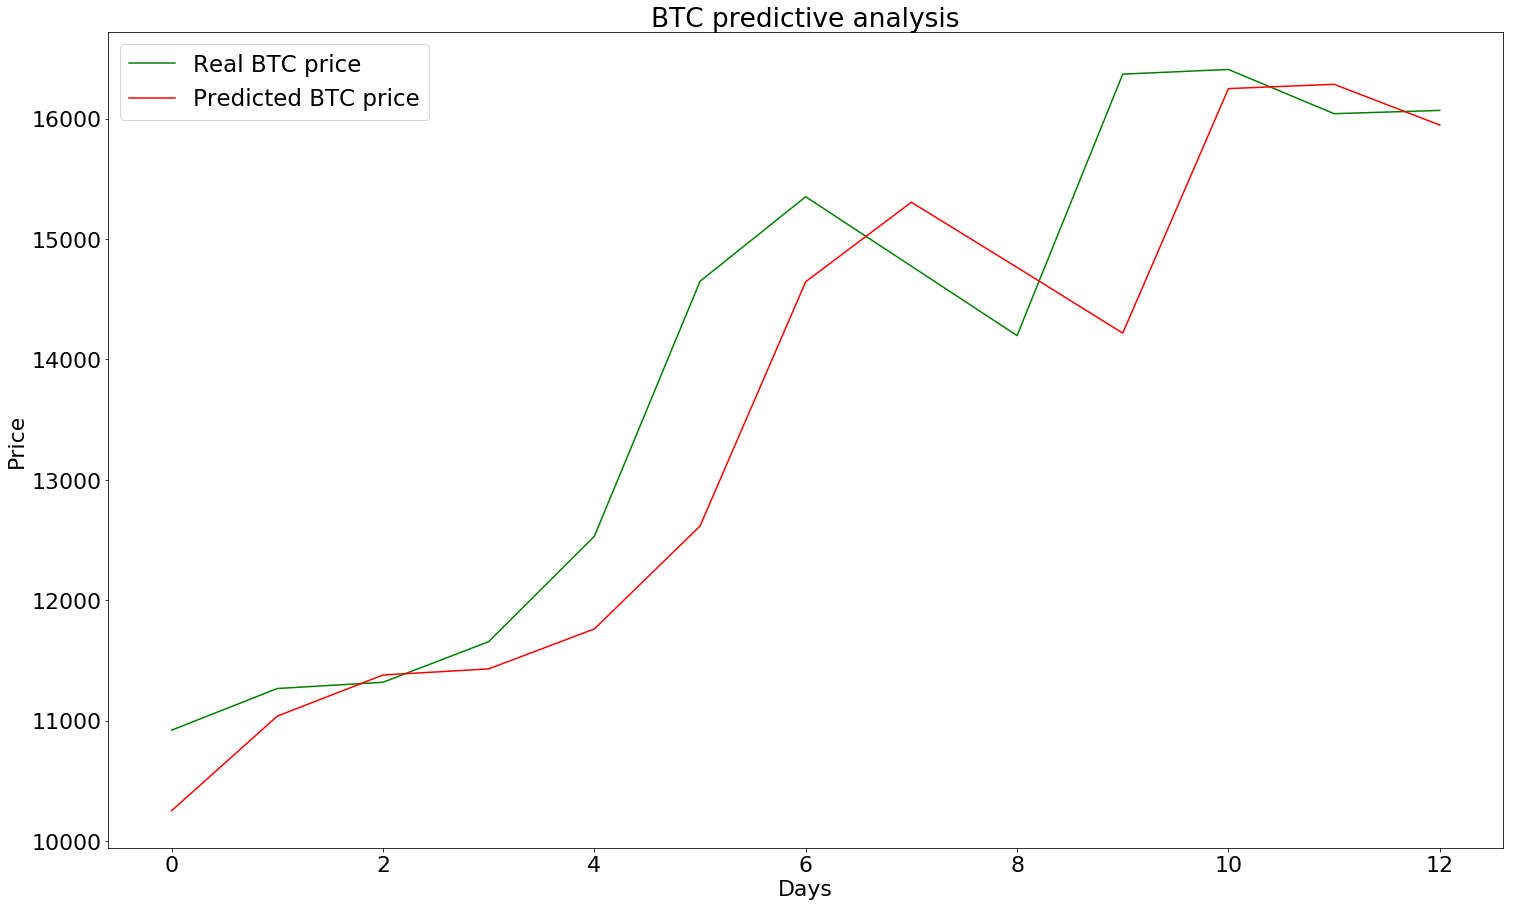

In [58]:
plt.figure(figsize=(25,15))
plt.plot(testY_actual , color ='green' , label="Real BTC price")
plt.plot(predictedvalues_actual , color ='red' , label="Predicted BTC price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend(loc=2, prop={'size': 23})
plt.title("BTC predictive analysis")